In [5]:
!pip install kaggle

In [14]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [16]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [17]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


# Printing Name of Images

In [19]:
file_names = os.listdir('train/')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

# Importing Dependancies

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import cv2


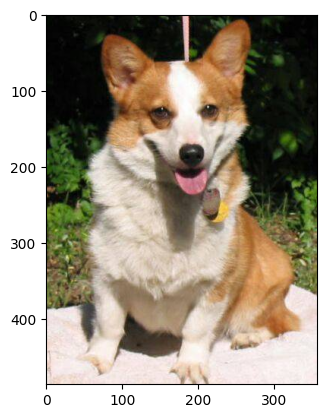

In [24]:
#Displaying Dog Images
img=mpimg.imread('train/dog.1528.jpg')
imgplt=plt.imshow(img)
plt.show()

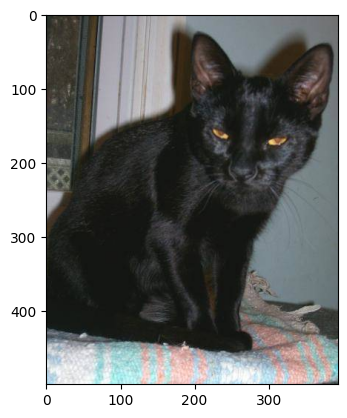

In [25]:
#Displaying cat Images
img=mpimg.imread('train/cat.1398.jpg')
imgplt=plt.imshow(img)
plt.show()

In [34]:
#Cat & Dog Image Count
file_name=os.listdir('train')

dogs_img=0
cats_img=0

for pic in file_name:
    name=pic[0:3]
    if name=='dog':
        dogs_img=dogs_img+1
    else:
        cats_img=cats_img+1
print("Number Cats Image:- ",cats_img)
print("Number Dogs Image:- ",dogs_img)

Number Cats Image:-  12500
Number Dogs Image:-  12500


# Resizing Of Images

In [40]:
#creating a directory for resized images
os.mkdir('image resized')

In [41]:
original_folder = 'train'
resized_folder = 'image resized'

In [42]:
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(25000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    newImgPath = resized_folder+filename
    img.save(newImgPath)

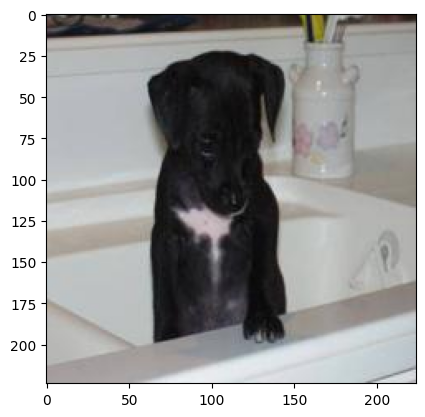

In [43]:
# display resized dog image
img = mpimg.imread('image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

# Labeling Cat=0 and Dog=1

In [52]:
labels=[]
file_names=os.listdir("image resized")
for i in range (25000):
    file_name=file_names[i]
    label=file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [53]:
#Counting Number of Cats and dogs
values,counts=np.unique(labels,return_counts=True)

print(values)
print(counts)

[0 1]
[12500 12500]


# Converting to numpy array

In [54]:
import glob

In [61]:
img_dir='image resized/'
img_extension=['jpg','png']

In [62]:
files = []

[files.extend(glob.glob(img_dir + '*.' + e)) for e in img_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [63]:
print(dog_cat_images.shape)

(25000, 224, 224, 3)


In [64]:
X=dog_cat_images
Y=np.asarray(labels)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


# Scaling

In [70]:
# scaling the data
#X_train_scaled = X_train/255

#X_test_scaled = X_test/255

# Model Building

In [80]:
import tensorflow as tf




In [81]:
import tensorflow_hub as hub

In [82]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [83]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])


In [84]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [85]:
model.fit(X_train, Y_train, epochs=2)

Epoch 1/2
625/625 [==============================] - 472s 749ms/step - loss: 0.5695 - acc: 0.7006
Epoch 2/2
625/625 [==============================] - 471s 753ms/step - loss: 0.5067 - acc: 0.7537


In [86]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

157/157 [==============================] - 119s 751ms/step - loss: 0.5218 - acc: 0.7444
Test Loss = 0.5217763781547546
Test Accuracy = 0.7444000244140625


# Predictive System

Path of the image to be predicted: Test_Image 1.jpg
1/1 [==============================] - 1s 618ms/step
[[-0.26675633  0.43529436]]
1
The image represents a Dog


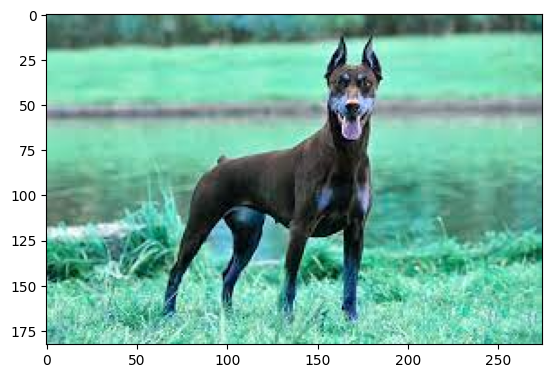

In [90]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: Test_Imge 2.jpg
1/1 [==============================] - 0s 72ms/step
[[ 0.16218491 -0.6428836 ]]
0
The image represents a Cat


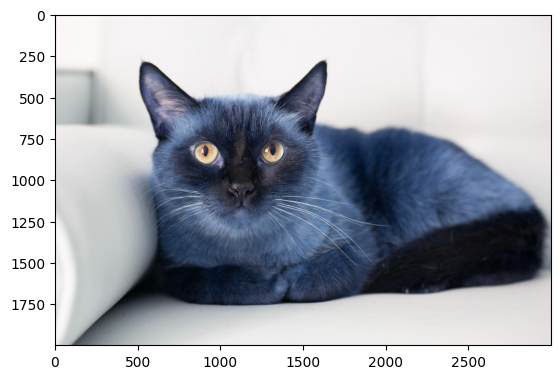

In [92]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')    